In [14]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

In [7]:
np.random.seed(10)
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

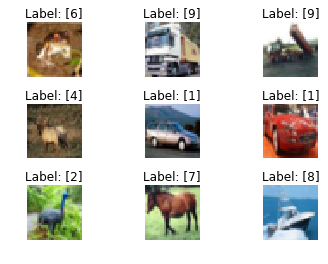

In [5]:
import matplotlib.pyplot as plt
sub_plot= 330
for i in range(0, 9):
    ax = plt.subplot(sub_plot+i+1)
    ax.imshow(X_train[i], cmap="binary")
    ax.set_title("Label: " + str(Y_train[i]))
    ax.axis("off")

plt.subplots_adjust(hspace = .5)
plt.show()

In [8]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding="same",
                 input_shape=X_train.shape[1:], activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), padding="same",
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary() 
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])

history = model.fit(X_train, Y_train, validation_split=0.2, 
                    epochs=9, batch_size=128, verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
__________

In [10]:
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("train {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("test {:.2f}".format(accuracy))

train 0.78
test 0.71


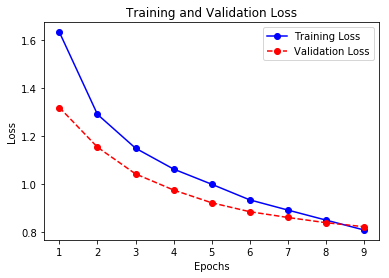

In [11]:
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

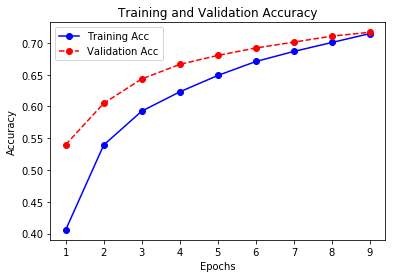

In [12]:
acc = history.history["acc"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_acc"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [15]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_test = X_test.astype("float32") / 255
Y_test_bk = Y_test.copy()  
Y_pred = model.predict_classes(X_test)

tb = pd.crosstab(Y_test_bk.astype(int).flatten(), 
                 Y_pred.astype(int),
                 rownames=["label"], colnames=["predict"])
print(tb)

predict    0    1    2    3    4    5    6    7    8    9
label                                                    
0        704   16   64   19   22   12   11   24   83   45
1         17  806    3   14    6   11    8    6   32   97
2         49    5  507   46  161   96   60   59   10    7
3         11    6   53  471   92  241   50   53    9   14
4         12    1   35   52  739   41   24   87    6    3
5         10    3   32  134   64  686   16   50    4    1
6          2    4   29   63   78   34  774    8    6    2
7          5    2   13   20   66   71    2  814    0    7
8         50   28   15   14   14   11    9    9  824   26
9         18   76    7   19   11   13   11   25   39  781


In [16]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
i = 8
img = X_test[i]

X_test_img = img.reshape(1, 32, 32, 3).astype("float32")
X_test_img = X_test_img / 255

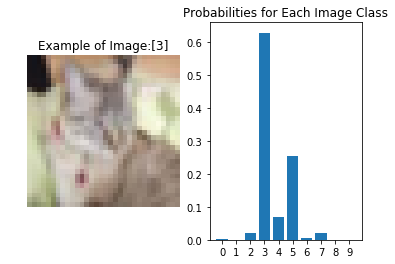

In [17]:
plt.figure()
plt.subplot(1,2,1)
plt.title("Example of Image:" + str(Y_test[i]))
plt.imshow(img, cmap="binary")
plt.axis("off")

probs = model.predict_proba(X_test_img, batch_size=1)
plt.subplot(1,2,2)
plt.title("Probabilities for Each Image Class")
plt.bar(np.arange(10), probs.reshape(10), align="center")
plt.xticks(np.arange(10),np.arange(10).astype(str))
plt.show()

In [18]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_test = X_test.astype("float32") / 255

In [19]:
Y_pred = model.predict_classes(X_test)
Y_probs = model.predict_proba(X_test)
# 分類錯誤
Y_test = Y_test.flatten()
df = pd.DataFrame({"label":Y_test, "predict":Y_pred})
df = df[Y_test!=Y_pred] 
print(df.head())

    label  predict
0       3        5
4       6        4
15      8        6
17      7        3
21      0        2


Index:  3737


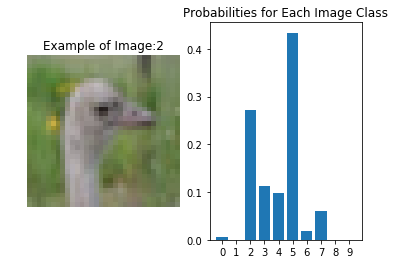

In [20]:
i = df.sample(n=1).index.values.astype(int)[0]
print("Index: ", i)
img = X_test[i] 
plt.figure()
plt.subplot(1,2,1)
plt.title("Example of Image:" + str(Y_test[i]))
plt.imshow(img, cmap="binary")
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Probabilities for Each Image Class")
plt.bar(np.arange(10), Y_probs[i].reshape(10), align="center")
plt.xticks(np.arange(10),np.arange(10).astype(str))
plt.show()